<a href="https://colab.research.google.com/github/tracyycc/titanic_analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%EF%BC%8301%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC_reference_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

環境準備

In [1]:
import pandas as pd
import numpy as np

載入資料

In [3]:
from google.colab import files
uploaded=files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [7]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Excersise: 請找出其他欄位的定義

Link: https://www.kaggle.com/competitions/titanic/data

Survived: Survived (1) or died (0)

Pclass: Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)

Name: Passenger’s name

Sex: Passenger’s sex

Age: Passenger’s age

SibSp: Number of siblings/spouses aboard (一同登船的表堂兄弟姊妹的個數)

Parch: Number of parents/children aboard (一同登船的父母與子女的個數)

Ticket: Ticket number

Fare: Fare

Cabin: Cabin

Embarked: Port of embarkation 登船位置港口名用縮寫 C, Q, S 表示



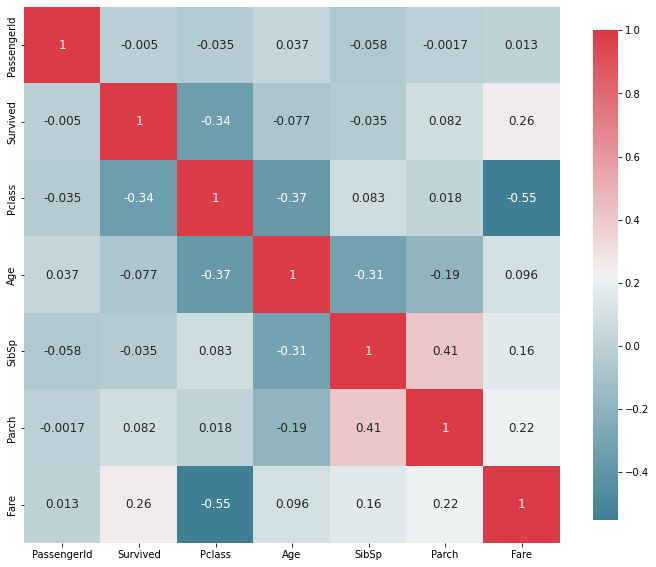

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

近一步觀察各屬性與是否生存之關係程度

In [10]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

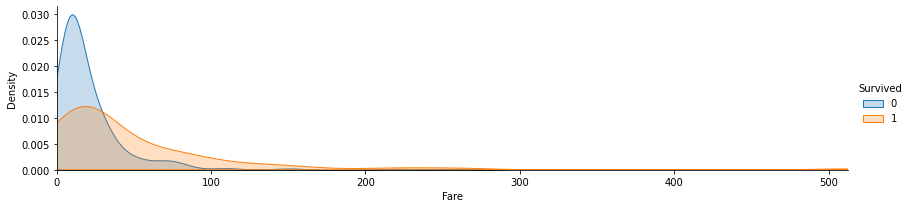

In [11]:
plot_distribution( df_train , var = 'Fare' , target = 'Survived' )
plt.show()

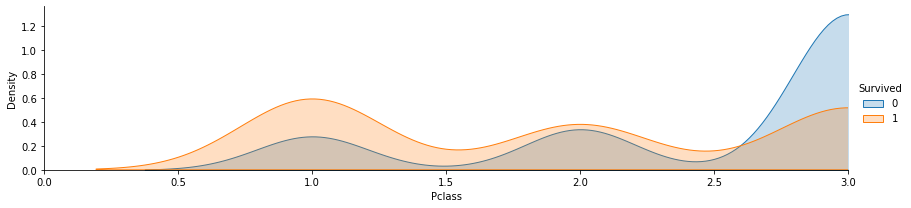

In [12]:
plot_distribution( df_train , var = 'Pclass' , target = 'Survived' )
plt.show()

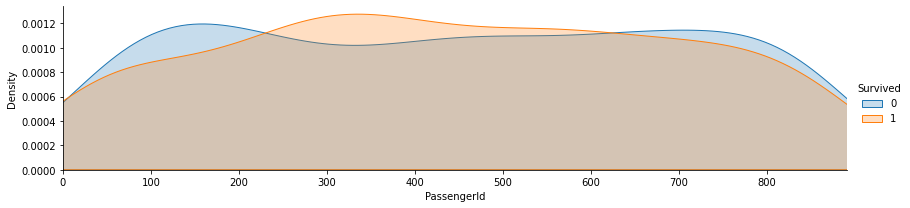

In [13]:
plot_distribution( df_train , var = 'PassengerId' , target = 'Survived' )
plt.show()

In [14]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


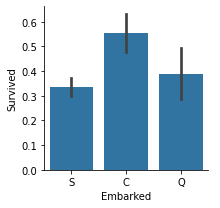

In [15]:
plot_categories( df_train , cat = 'Embarked' , target = 'Survived' )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


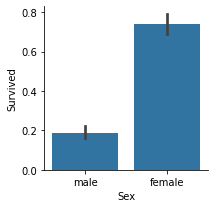

In [16]:
plot_categories( df_train , cat = 'Sex' , target = 'Survived' )
plt.show()

資料清理

In [17]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
df_train.info()
#object:Sex,Ticket,Cabin,Embarked
#number:Pclass,Age,SibSp,Parch,Fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


資料空值處理

In [19]:
df_train.info()
#Age,Cabin,Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Embarked'] = df_train['Embarked'].fillna('None')

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


資料型態轉換

In [22]:
df_train['Sex']
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
sex_encoding = {
    'male': 0,
    'female': 1
}
df_train['Sex'] = df_train['Sex'].map(lambda d: sex_encoding[d])

In [24]:
df_Embarked_ohe = pd.get_dummies(df_train['Embarked'], prefix='Embarked_')
df_Embarked_ohe

,Embarked__C,Embarked__None,Embarked__Q,Embarked__S
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
886,0,0,0,1
887,0,0,0,1
888,0,0,0,1
889,1,0,0,0


In [25]:
df_train = df_train.join(df_Embarked_ohe)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked__C,Embarked__None,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C,1,0,0,0


特徵工程

從乘客名稱抽取出頭銜

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked__C,Embarked__None,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1


In [27]:
df_train['Title Row'] = df_train['Name'].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

title_encoding = {
  "Capt":       "Officer",
  "Col":        "Officer",
  "Major":      "Officer",
  "Jonkheer":   "Royalty",
  "Don":        "Royalty",
  "Sir" :       "Royalty",
  "Dr":         "Officer",
  "Rev":        "Officer",
  "the Countess":"Royalty",
  "Dona":       "Royalty",
  "Mme":        "Mrs",
  "Mlle":       "Miss",
  "Ms":         "Mrs",
  "Mr" :        "Mr",
  "Mrs" :       "Mrs",
  "Miss" :      "Miss",
  "Master" :    "Master",
  "Lady" :      "Royalty"
}

df_train['Title'] = df_train['Title Row'].map(title_encoding)
df_train['Title']


0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
886    Officer
887       Miss
888       Miss
889         Mr
890         Mr
Name: Title, Length: 891, dtype: object

In [28]:
df_Title_ohe = pd.get_dummies(df_train['Title'], prefix='Title_')
df_Title_ohe

,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,1,0
887,0,1,0,0,0,0
888,0,1,0,0,0,0
889,0,0,1,0,0,0


In [29]:
df_train = df_train.join(df_Title_ohe)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked__Q,Embarked__S,Title Row,Title,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,...,0,1,Mr,Mr,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,...,0,0,Mrs,Mrs,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,...,0,1,Miss,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,...,0,1,Mrs,Mrs,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,...,0,1,Mr,Mr,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,...,0,1,Rev,Officer,0,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,...,0,1,Miss,Miss,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,...,0,1,Miss,Miss,0,1,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,...,0,0,Mr,Mr,0,0,1,0,0,0


Parch+SibSp=家庭人數

In [30]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked__Q,Embarked__S,Title Row,Title,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,1,Mr,Mr,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,0,Mrs,Mrs,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,Miss,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,1,Mrs,Mrs,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,1,Mr,Mr,0,0,1,0,0,0


In [31]:
df_train['FamilySize'] = df_train['Parch'] + df_train['SibSp'] + 1
df_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

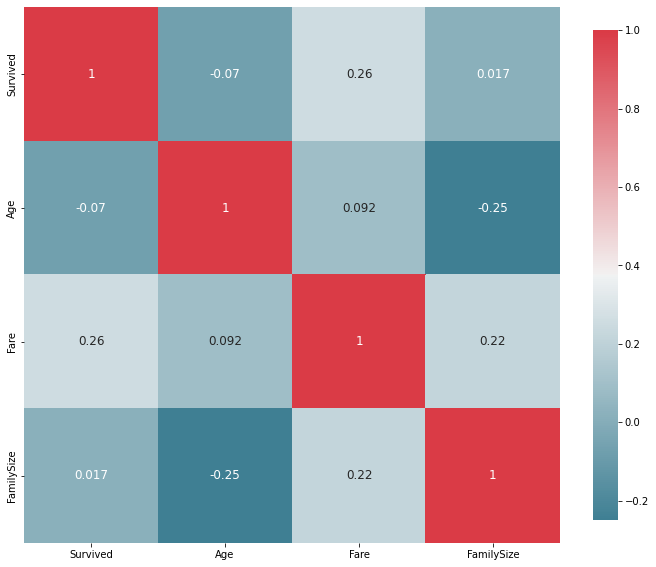

In [32]:
corr = df_train[['Survived', 'Age', 'Fare', 'FamilySize']].corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

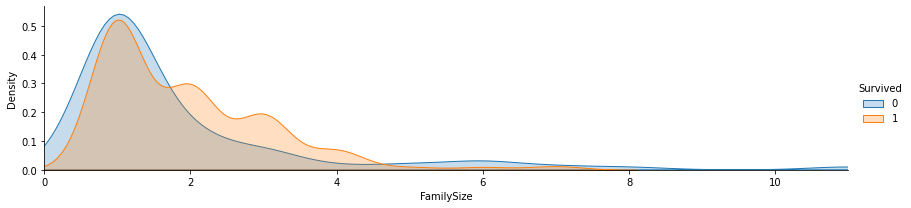

In [33]:
plot_distribution( df_train , var = 'FamilySize' , target = 'Survived' )
plt.show()

In [34]:
df_train['Family_Single'] = df_train[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
df_train['Family_Small']  = df_train[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
df_train['Family_Large']  = df_train[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

def FamilySizeTranform(s):
  if s >= 1 and s <= 3:
    return 3
  if s >= 4 and s <= 6:
    return 2
  return 1

df_train['FamilySizeEncoding'] = df_train[ 'FamilySize' ].map(FamilySizeTranform)

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,FamilySize,Family_Single,Family_Small,Family_Large,FamilySizeEncoding
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,...,0,1,0,0,0,2,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,...,0,0,1,0,0,2,0,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,0,1,1,0,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,...,0,0,1,0,0,2,0,1,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,...,0,1,0,0,0,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,...,0,0,0,1,0,1,1,0,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,...,1,0,0,0,0,1,1,0,0,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,...,1,0,0,0,0,4,0,1,0,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,...,0,1,0,0,0,1,1,0,0,3


模型分析

In [35]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked__C',
       'Embarked__None', 'Embarked__Q', 'Embarked__S', 'Title Row', 'Title',
       'Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs',
       'Title__Officer', 'Title__Royalty', 'FamilySize', 'Family_Single',
       'Family_Small', 'Family_Large', 'FamilySizeEncoding'],
      dtype='object')

In [36]:
columns_X = [
       'Pclass', 'Sex', 'Age', 'Fare',
       'SibSp', 'Parch', 
       'Embarked__C', 'Embarked__None', 'Embarked__Q', 'Embarked__S', 
]
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.78212291 0.78089888 0.78651685 0.76966292 0.8258427 ]
0.789008850668508


In [37]:
columns_X = [
       'Pclass', 'Sex', 'Age', 'Fare',
       'SibSp', 'Parch', 
       'Embarked__C', 'Embarked__None', 'Embarked__Q', 'Embarked__S', 
       'Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs', 'Title__Officer', 'Title__Royalty'
]
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.83798883 0.82022472 0.80337079 0.80337079 0.86516854]
0.8260247316552632


In [38]:
columns_X = [
       'Pclass', 'Sex', 'Age', 'Fare',
       'FamilySizeEncoding',
       'Embarked__C', 'Embarked__None', 'Embarked__Q', 'Embarked__S', 
       'Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs', 'Title__Officer', 'Title__Royalty'
]
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.82681564 0.82022472 0.80898876 0.81460674 0.86516854]
0.8271608813006088


In [39]:
# machine learning
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [40]:
# logistic regression 
log = LogisticRegression(random_state=0)
scores_1 = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# Support Vector Machines
svc = SVC()
scores_2 = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# Decision Tree
decision_tree = DecisionTreeClassifier()
scores_3 = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_4 = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# Gaussian Naive Baye
gaussian = GaussianNB()
scores_5 = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
scores_6 = cross_val_score(rf, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [41]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Support Vector Machines',
              'Decision Tree',
              'KNN',  
              'Naive Bayes',
              'RandomForestClassifier' ],
    'Score': [scores_1, scores_2, scores_3, scores_4, scores_5, scores_6]})

models

,Model,Score
0,Logistic Regression,0.823803
1,Support Vector Machines,0.672381
2,Decision Tree,0.763216
3,KNN,0.721706
4,Naive Bayes,0.793585
5,RandomForestClassifier,0.814826


In [42]:
from sklearn.model_selection import GridSearchCV

svc = SVC()
Parameters = {
    'C' : [ 1.5, 2, 2.5],
    'gamma' : [0.05,0.1],
    'kernel' : ['rbf']
}

clf= GridSearchCV(svc, Parameters, cv = 5, n_jobs = 6)
clf.fit(train_X, train_y)
print(clf.best_params_)
# Result: C = 2, gamma = 0.1 if using Gaussian Kernel

scores_7 = cross_val_score(svc, train_X, train_y.values.ravel(), cv=5,scoring='accuracy').mean()
print(scores_7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 2.5, 'gamma': 0.05, 'kernel': 'rbf'}
0.6723808925993346


In [43]:
rf = RandomForestClassifier(n_estimators=100)
Parameters = {
  'max_depth' : [6, 8],
  'n_estimators': [50, 10],
  'max_features': ['sqrt', 'auto'],
  'min_samples_split': [3, 10],
  'min_samples_leaf': [3, 10],
  'bootstrap': [True, False],
}

rf = GridSearchCV(rf, Parameters,cv = 5)
scores_8 = cross_val_score(rf, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_8)

0.8237900947837551


In [44]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Support Vector Machines',
              'Decision Tree',
              'KNN',  
              'Naive Bayes',
              'RandomForestClassifier',
              'Support Vector Machines  (Opt)',
              'RandomForestClassifier (Opt)'
              ],
    'Score': [scores_1, scores_2, scores_3, scores_4, scores_5, scores_6, scores_7, scores_8]})

models

,Model,Score
0,Logistic Regression,0.823803
1,Support Vector Machines,0.672381
2,Decision Tree,0.763216
3,KNN,0.721706
4,Naive Bayes,0.793585
5,RandomForestClassifier,0.814826
6,Support Vector Machines (Opt),0.672381
7,RandomForestClassifier (Opt),0.823790


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2)

print(X_train.shape) # (547, 15)
print(y_train.shape)
print(X_test.shape) # (137, 15)
print(y_test.shape)

import tensorflow as tf
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=2)

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(712, 15)
(712, 1)
(179, 15)
(179, 1)
(712, 2)
(179, 2)


In [46]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)
        self.predict = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        output1 = self.hidden1(x)
        output2 = self.hidden2(output1)
        output = F.softmax(self.predict(output2))
        return output

# 模型、優化器初始化
model = Model(X_test.shape[1], 32, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.CrossEntropyLoss()


# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train.values, dtype=torch.float32) # [120, 4]
y_data = torch.tensor(y_train_onehot, dtype=torch.float32) # [120, 3]
x_test_data = torch.tensor(X_test.values, dtype=torch.float32) # [120, 4]
y_test_data = torch.tensor(y_test_onehot, dtype=torch.float32) # [120, 3]


batch_size = 16
num_epochs = 100
num_batches = len(X_train) // batch_size
loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        prediction = model(x_data[start:end])
        loss = loss_func(prediction, y_data[start:end])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(x_data), y_data)
    loss_list.append(loss.item())

    test_loss = loss_func(model(x_test_data), y_test_data)
    test_loss_list.append(test_loss.item())

    # print(loss)

print(' ===== done =====')

print(loss_list)
print(test_loss_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


 ===== done =====
[0.6065084934234619, 0.6052278280258179, 0.6048057079315186, 0.6044960618019104, 0.6041741371154785, 0.6038094758987427, 0.6033951044082642, 0.6029305458068848, 0.6024178862571716, 0.6018598079681396, 0.6012600660324097, 0.6006232500076294, 0.5999557971954346, 0.599266767501831, 0.5985692143440247, 0.5978766679763794, 0.5971904993057251, 0.5965022444725037, 0.5958048701286316, 0.5950992703437805, 0.5943927764892578, 0.5936955809593201, 0.5930201411247253, 0.5923786163330078, 0.5917816162109375, 0.5912377834320068, 0.590753436088562, 0.5903345346450806, 0.5900295376777649, 0.590107262134552, 0.5885570645332336, 0.5876419544219971, 0.5913844704627991, 0.5989394783973694, 0.6017287969589233, 0.6039299368858337, 0.5927869081497192, 0.5893681645393372, 0.5921282172203064, 0.5918891429901123, 0.5927162766456604, 0.5933238863945007, 0.5856801867485046, 0.5920062065124512, 0.615719735622406, 0.5939522385597229, 0.5893177390098572, 0.5883611440658569, 0.587669312953949, 0.5872

Text(0, 0.5, 'BCE Loss')

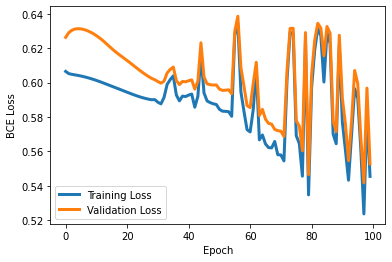

In [47]:
import matplotlib.pyplot as plt
plt.plot(loss_list, linewidth=3)
plt.plot(test_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

In [48]:
x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_pred = model(x_test_data)
y_pred = y_pred.argmax(1) # one hot array to int array
accuracy_score(y_test, y_pred.detach().numpy()) # accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


0.7486033519553073